[*********************100%%**********************]  1 of 1 completed


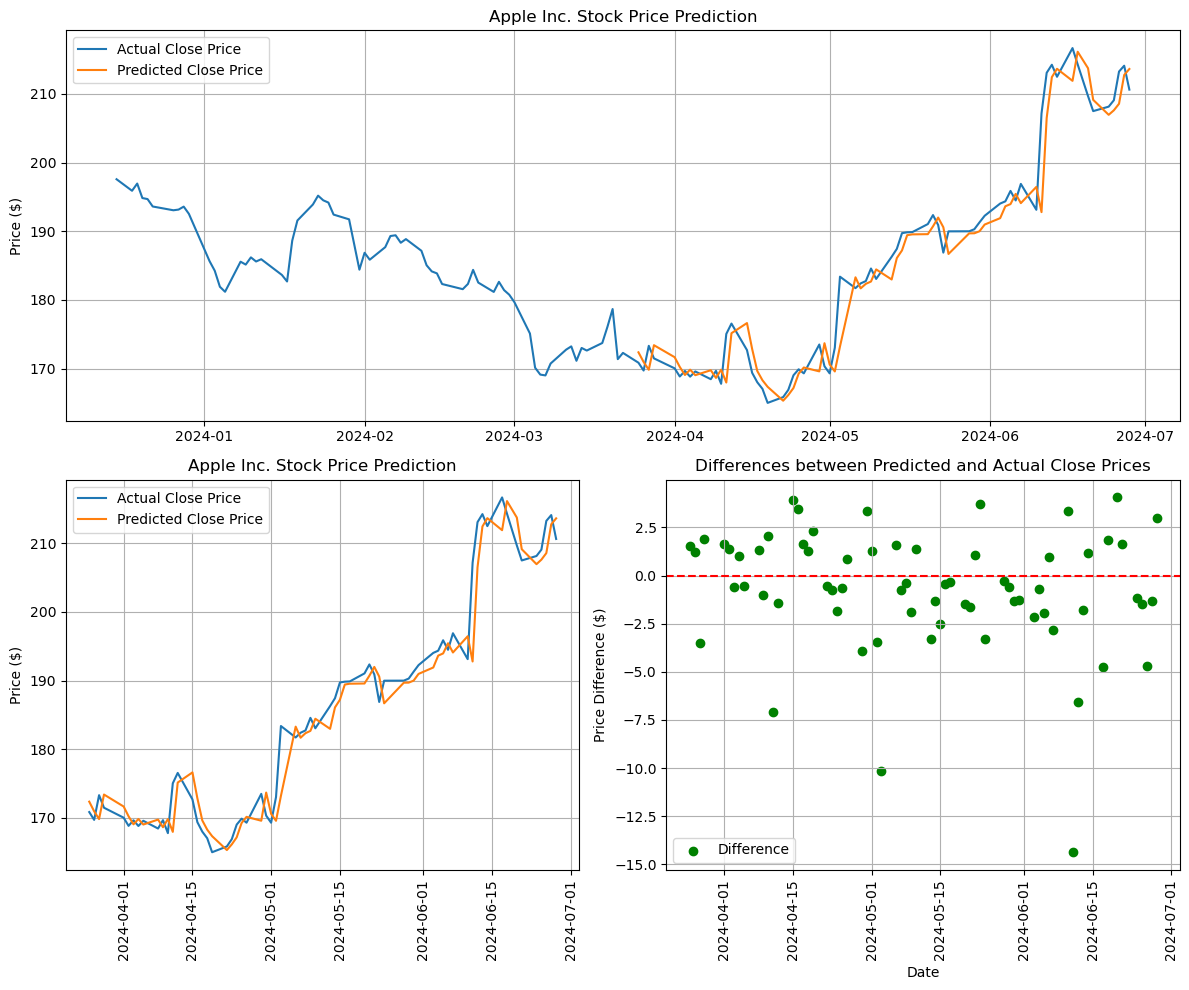

[*********************100%%**********************]  1 of 1 completed

MSE is 698.37087


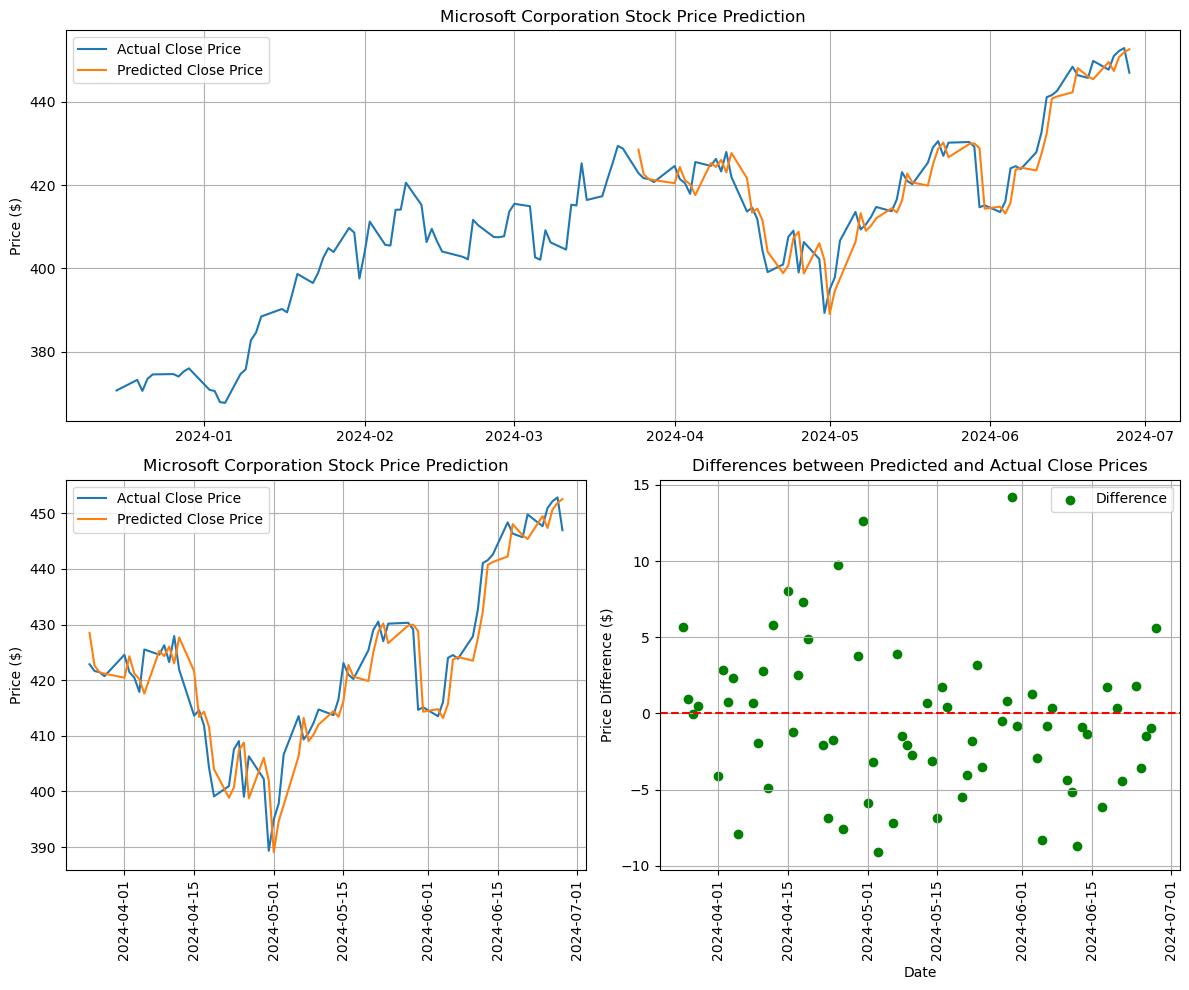

MSE is 1583.88468


[*********************100%%**********************]  1 of 1 completed


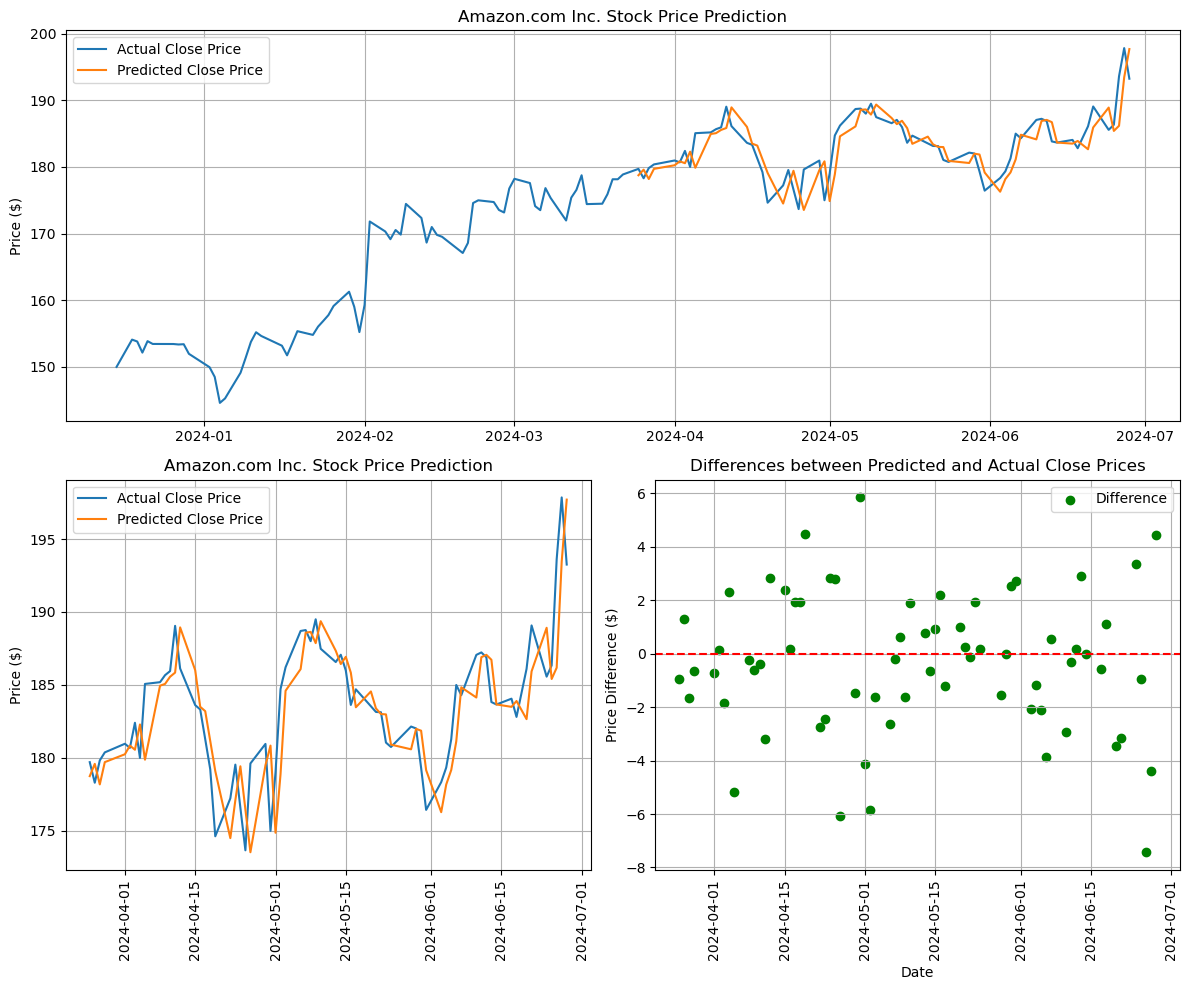

MSE is 465.11719


[*********************100%%**********************]  1 of 1 completed


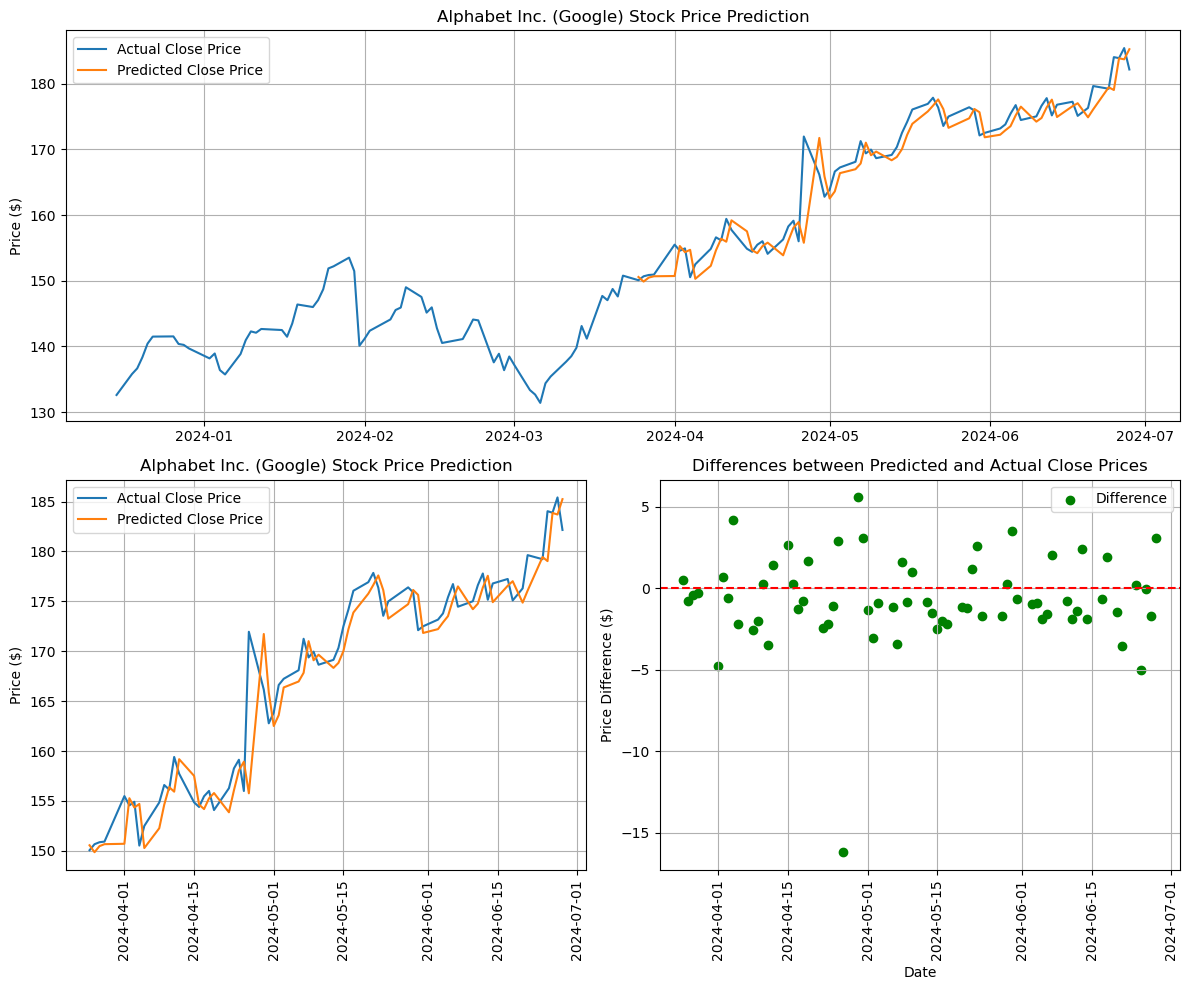

MSE is 567.14150


[*********************100%%**********************]  1 of 1 completed
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramete

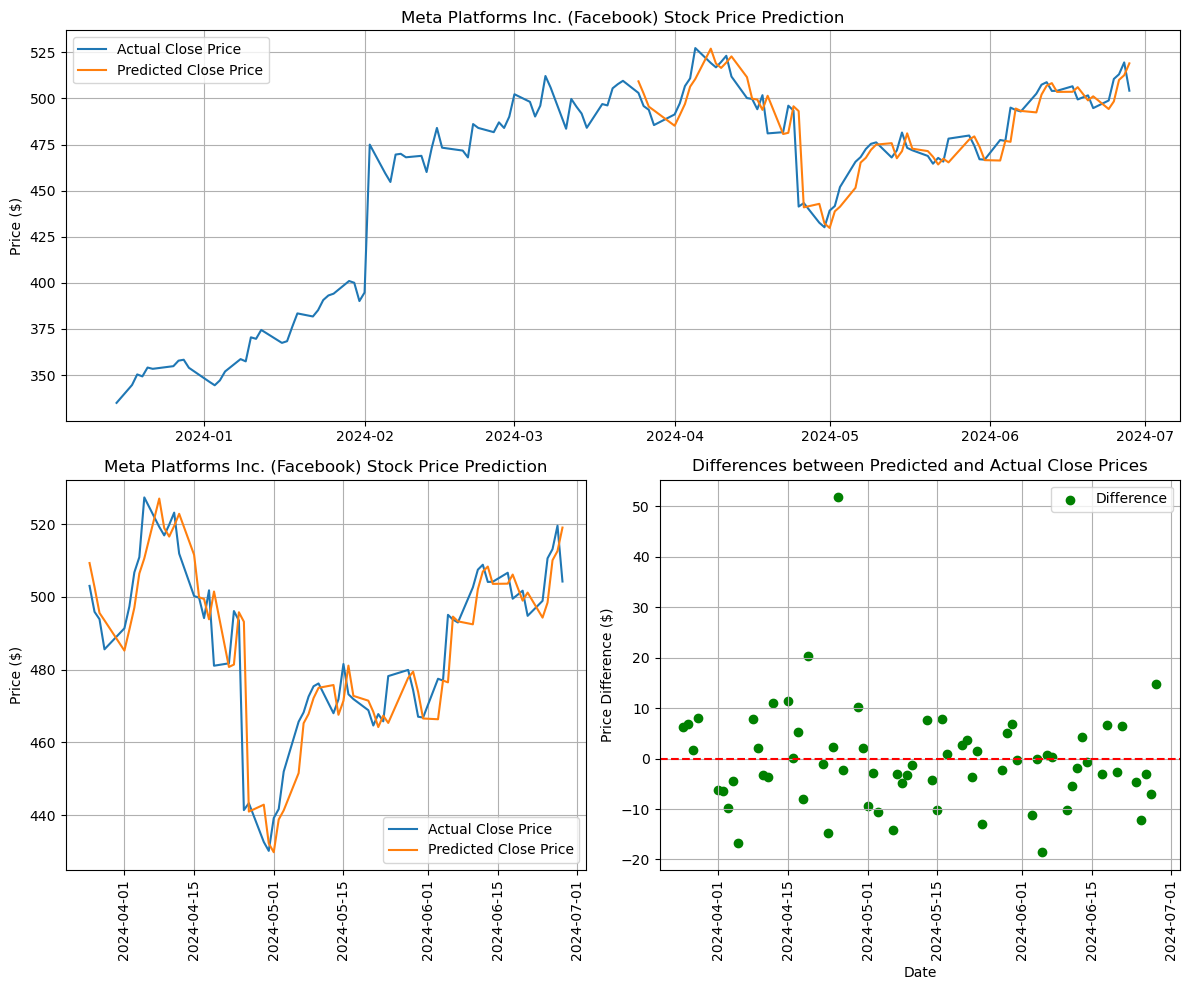

MSE is 6636.89376


[*********************100%%**********************]  1 of 1 completed


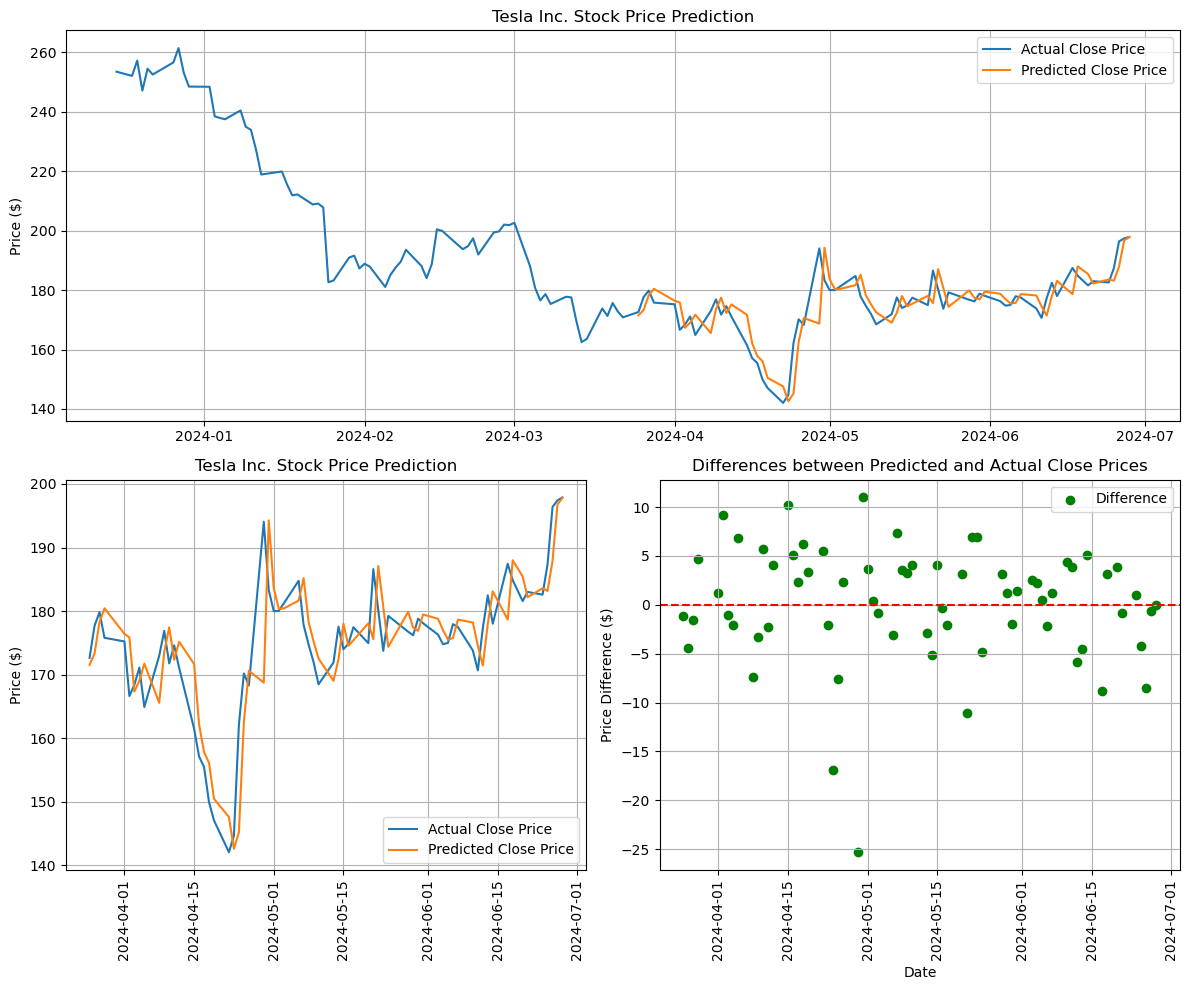

MSE is 2402.21883


[*********************100%%**********************]  1 of 1 completed
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramete

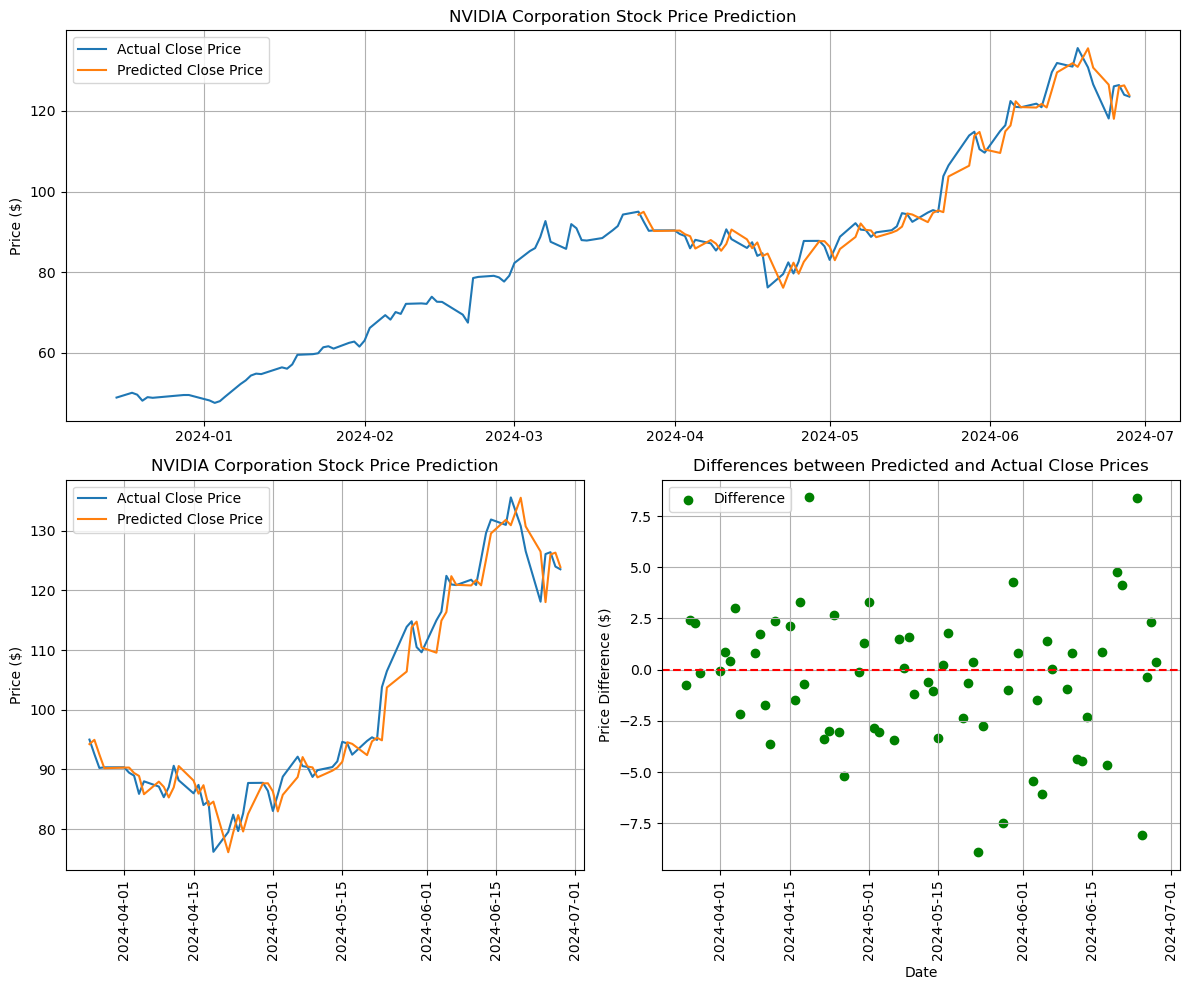

MSE is 756.93192


(                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2024-03-25   93.941002   96.765999   93.510002   95.001999   94.994194   
 2024-03-26   95.850998   96.375000   92.501999   92.560997   92.553398   
 2024-03-27   93.112000   93.239998   89.123001   90.250000   90.242584   
 2024-03-28   90.000000   91.300003   89.193001   90.356003   90.348579   
 2024-04-01   90.299004   92.224998   89.204002   90.362999   90.355576   
 ...                ...         ...         ...         ...         ...   
 2024-06-24  123.239998  124.459999  118.040001  118.110001  118.110001   
 2024-06-25  121.199997  126.500000  119.320000  126.089996  126.089996   
 2024-06-26  126.129997  128.119995  122.599998  126.400002  126.400002   
 2024-06-27  124.099998  126.410004  122.919998  123.989998  123.989998   
 2024-06-28  124.580002  127.709999  122.750000  123.540001  123.540001   
 
                Volume 

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

ticker_to_name = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'AMZN': 'Amazon.com Inc.',
    'GOOGL': 'Alphabet Inc. (Google)',
    'META': 'Meta Platforms Inc. (Facebook)',
    'TSLA': 'Tesla Inc.',
    'NVDA': 'NVIDIA Corporation'
}

def predict_todays_price(data_tem, today_date, days_use2predict, arimaorder):
    end_date_dt = datetime.strptime(today_date, '%Y-%m-%d') - timedelta(days=1)
    end_date = end_date_dt.strftime('%Y-%m-%d')
    
    start_date_dt = end_date_dt - timedelta(days=days_use2predict-1)
    start_date = start_date_dt.strftime('%Y-%m-%d')
    
    data_sub = data_tem[(data_tem.index <= end_date) & (data_tem.index >= start_date)]
    # Ensure index has frequency set (daily frequency)
    data_sub.index = pd.DatetimeIndex(data_sub.index).to_period('D')
    
    # Prediction
    model = ARIMA(data_sub['Close'], order=arimaorder)  
    model_fit = model.fit()
    today_price = model_fit.forecast(steps=1).iloc[0]
    
    return today_price
    

def predict_price(ticker_symbol, days_use2predict, n_days2Predict, arimaorder):
    
    # Get data for the past 10 years
    start_date = '2014-07-01'
    end_date = datetime.today().strftime('%Y-%m-%d')
    
    # Fetch the data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data['DaS'] = data.index.strftime('%Y-%m-%d') # Date as String
    
    days2Predict = data.index[(data.index <= datetime.today().strftime('%Y-%m-%d')) & \
    (data.index >= (datetime.today() - timedelta(days=n_days2Predict)).strftime('%Y-%m-%d'))]
    
    data_tem = data
    data['Prediction'] = np.nan 
    for dp in days2Predict:
        data.loc[data.DaS == dp.strftime('%Y-%m-%d'),'Prediction'] = predict_todays_price(data_tem, dp.strftime('%Y-%m-%d'), days_use2predict, arimaorder)
     
    data_pred = data.dropna()
    
    plt.figure(figsize=(12, 10))
    
    # Subplot 1: Actual vs Predicted Close Prices
    plt.subplot(2, 1, 1)
    plt.plot(data.index[-data_pred.shape[0]*2:], data['Close'][-data_pred.shape[0]*2:], label='Actual Close Price')
    plt.plot(data.index[-data_pred.shape[0]*2:], data['Prediction'][-data_pred.shape[0]*2:], label='Predicted Close Price')
    plt.title(f'{ticker_to_name[ticker_symbol]} Stock Price Prediction')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.legend()
    
    # Subplot 2: Actual vs Predicted Close Prices
    plt.subplot(2, 2, 3)
    plt.plot(data_pred.index, data_pred['Close'], label='Actual Close Price')
    plt.plot(data_pred.index, data_pred['Prediction'], label='Predicted Close Price')
    plt.title(f'{ticker_to_name[ticker_symbol]} Stock Price Prediction')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=90)  # Rotating x-axis ticks by 45 degrees
    plt.grid(True)
    plt.legend()
    
    # Subplot 3: Differences between Predicted and Actual Close Prices
    plt.subplot(2, 2, 4)
    # Plotting differences, handling NaN values
    differences = data_pred['Prediction'] - data_pred['Close']
    plt.scatter(data_pred.index, differences, color='g', label='Difference')
    plt.title('Differences between Predicted and Actual Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Price Difference ($)')
    plt.grid(True)
    plt.xticks(rotation=90)  # Rotating x-axis ticks by 45 degrees
    plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0 for reference
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{ticker_symbol}_stock_prediction.png')
    plt.show()
    
    fitted_MSE = sum((data_pred['Prediction'] - data_pred['Close'])**2)
    print(f'MSE is {fitted_MSE:.5f}')
    
    return data_pred, fitted_MSE


predict_price(ticker_symbol='AAPL', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='MSFT', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='AMZN', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='GOOGL', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='META', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='TSLA', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))
predict_price(ticker_symbol='NVDA', days_use2predict=365, n_days2Predict=100, arimaorder=(1,0,0))